# <center> ANN From Scratch </center>

### <center> Sigmoid (Activation Function) </center>

In [1]:
import numpy as np

![Sigmoid](https://raw.githubusercontent.com/Ahmedteima/hands-on-from-scratch/main/Sigmoid.jpeg)

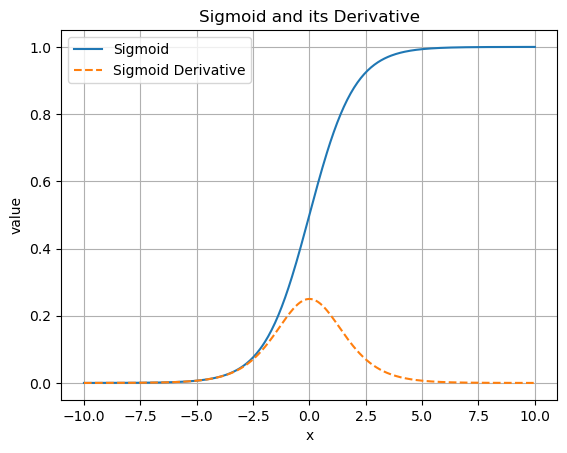

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Data
x = np.linspace(-10, 10, 400)
y = sigmoid(x)
dy = sigmoid_derivative(x)

# Plot
plt.figure()
plt.plot(x, y, label="Sigmoid")
plt.plot(x, dy, linestyle="--", label="Sigmoid Derivative")
plt.title("Sigmoid and its Derivative")
plt.xlabel("x")
plt.ylabel("value")
plt.legend()
plt.grid(True)
plt.show()

### <center> Basic ANN Architecture </center>

![ANN](https://www.researchgate.net/profile/Akizur-Rahman/publication/337533434/figure/fig1/AS:829406142550016@1574757242811/The-basic-ANN-architecture-Neuron-is-the-smallest-processing-component-of-the-ANN.jpg)

#### Initialize weights and biases

In [7]:
def initialize_params(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

#### Forward Propagation

![Forward Propagation](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*FczAiD6e8zWjWupOQkP_-Q.png)

In [9]:
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    cache = (X, Z1, A1, Z2, A2)
    return A2, cache

In [10]:
# Compute binary cross-entropy loss
def compute_loss(Y, A2):
    m = Y.shape[0]
    loss = -np.sum(Y * np.log(A2 + 1e-8) + (1 - Y) * np.log(1 - A2 + 1e-8)) / m
    return loss

#### Backward Propagation

![Backward Propagation](https://raw.githubusercontent.com/Ahmedteima/hands-on-from-scratch/main/BackPropagation_ANN.jpeg)


In [12]:
# Backward pass
def backward_pass(cache, W2, Y):
    X, Z1, A1, Z2, A2 = cache
    m = Y.shape[0]
    
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2

In [14]:
# Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    return W1, b1, W2, b2

In [27]:
# Training function
def train(X, Y, hidden_size=3, epochs=10000, lr=0.1):
    input_size = X.shape[1]
    output_size = 1
    W1, b1, W2, b2 = initialize_params(input_size, hidden_size, output_size)
    
    for i in range(epochs):
        A2, cache = forward_pass(X, W1, b1, W2, b2)
        loss = compute_loss(Y, A2)
        dW1, db1, dW2, db2 = backward_pass(cache, W2, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
        
        if i % 1000 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")
    
    return W1, b1, W2, b2

In [25]:
# Prediction
def predict(X, W1, b1, W2, b2):
    A2, _ = forward_pass(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)

In [26]:
# Example dataset
X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])

Y = np.array([[0],[1],[1],[0],[1],[0],[0],[1]])  # Example labels

# Train the network
W1, b1, W2, b2 = train(X, Y, hidden_size=3, epochs=10000, lr=0.1)

# Make predictions
predictions = predict(X, W1, b1, W2, b2)
print("Predictions:")
print(predictions)

[0 0 0]
Epoch 0, Loss: 0.6931
Epoch 1000, Loss: 0.6931
Epoch 2000, Loss: 0.6931
Epoch 3000, Loss: 0.6931
Epoch 4000, Loss: 0.6931
Epoch 5000, Loss: 0.6931
Epoch 6000, Loss: 0.6931
Epoch 7000, Loss: 0.6931
Epoch 8000, Loss: 0.6931
Epoch 9000, Loss: 0.6931
Predictions:
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]


In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

np.random.seed(0)

X = np.random.rand(500, 3)        # 500 samples, 3 features

# A non-linear target function (mix of rules to make it harder)
Y = ((X[:,0] + X[:,1]**2 - X[:,2]) > 0.7).astype(int).reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

W1, b1, W2, b2 = train(X_train, Y_train, hidden_size=6, epochs=12000, lr=0.1)

y_pred_prob = predict(X_test, W1, b1, W2, b2)

y_pred = (y_pred_prob >= 0.5).astype(int)

print("Accuracy :", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall   :", recall_score(Y_test, y_pred))
print("F1 Score :", f1_score(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))

[0.57754295 0.95943334 0.64557024]
Epoch 0, Loss: 0.6896
Epoch 1000, Loss: 0.4669
Epoch 2000, Loss: 0.2883
Epoch 3000, Loss: 0.1805
Epoch 4000, Loss: 0.1357
Epoch 5000, Loss: 0.1125
Epoch 6000, Loss: 0.0985
Epoch 7000, Loss: 0.0891
Epoch 8000, Loss: 0.0825
Epoch 9000, Loss: 0.0776
Epoch 10000, Loss: 0.0739
Epoch 11000, Loss: 0.0709
Accuracy : 0.9533333333333334
Precision: 0.875
Recall   : 0.9459459459459459
F1 Score : 0.9090909090909091

Confusion Matrix:
 [[108   5]
 [  2  35]]
